In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/pieski_png.zip"

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Model
from keras.utils import np_utils
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
dogs_valid = tf.keras.utils.image_dataset_from_directory("/content/pieski_png",
                                                   image_size=(224, 224), validation_split=0.1,
                                                   subset='validation', seed=123)
dogs_train = tf.keras.utils.image_dataset_from_directory('/content/pieski_png', 
                                                   image_size=(224, 224), validation_split=0.1,
                                                   subset='training', seed=123)

Found 6000 files belonging to 15 classes.
Using 600 files for validation.
Found 6000 files belonging to 15 classes.
Using 5400 files for training.


In [ ]:
dog_labels =['beagle', 'bernese', 'border_collie', 'chihuahua', 'corgi', 
             'dachshund', 'golden_retriever', 'husky', 'labrador', 'pomeranian', 
             'pug', 'rottweiler', 'samoyed', 'shiba_inu', 'yorkshire_terrier']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


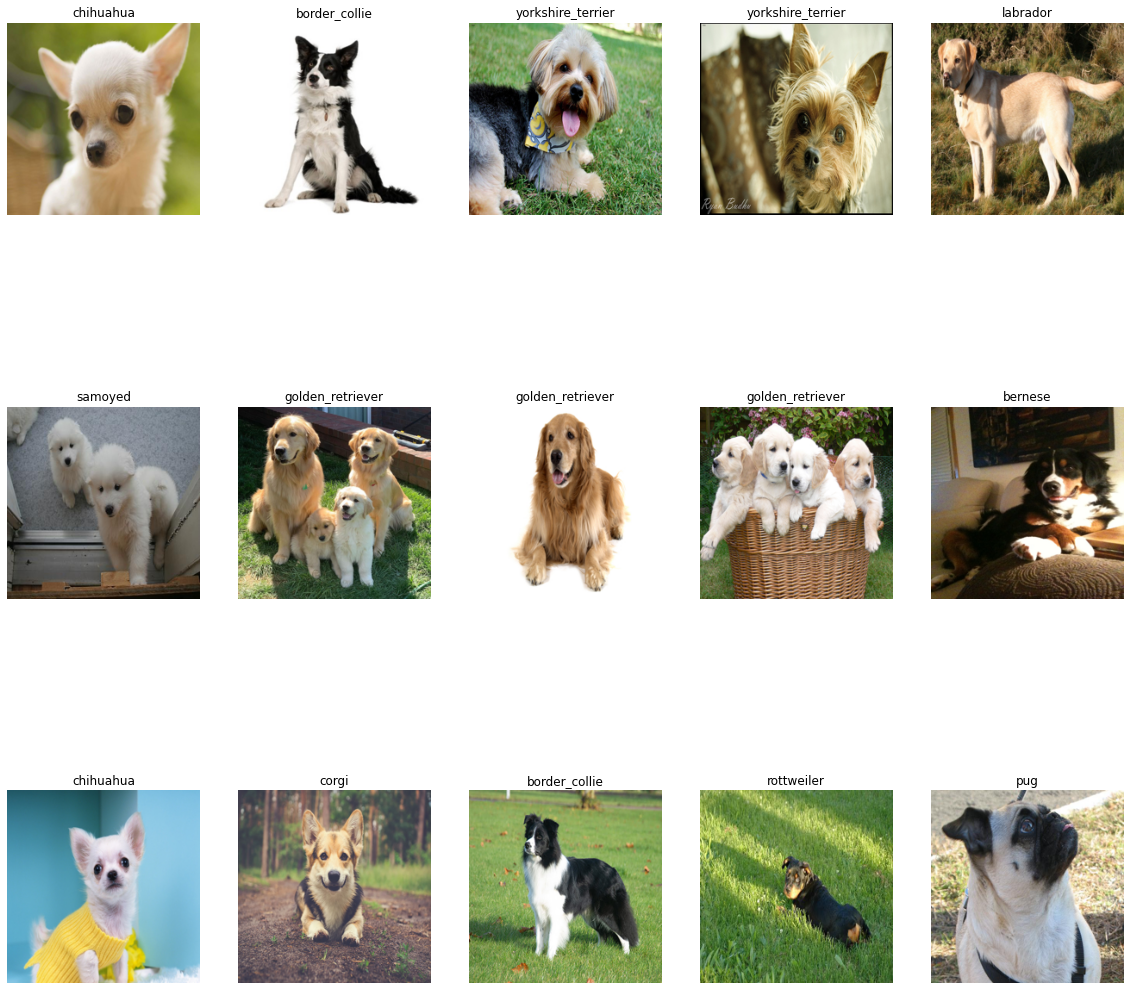

In [ ]:
plt.figure(figsize=(20, 20))
for images, labels in dogs_train.take(2):
  for i in range(15):
    ax = plt.subplot(3, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(dog_labels[labels[i]])
    plt.axis("off")

## Inception V3 with transfer learning - 7 epochs

In [ ]:
base_model = tf.keras.applications.InceptionV3(input_shape=(224, 224, 3),include_top=False,weights='imagenet')
base_model.trainable = True
keras_model = tf.keras.Sequential()
keras_model.add(base_model)
keras_model.add(tf.keras.layers.Conv2D(16,kernel_size=4,activation='relu', input_shape =(224,224,3), padding='SAME'))
keras_model.add(tf.keras.layers.BatchNormalization())
keras_model.add(tf.keras.layers.MaxPooling2D())
keras_model.add(tf.keras.layers.Flatten())
keras_model.add(tf.keras.layers.Dropout(0.3))
keras_model.add(tf.keras.layers.Dense(100, activation='relu'))
keras_model.add(tf.keras.layers.Dense(15, activation='sigmoid'))
model = keras_model
model.summary()

adam = tf.keras.optimizers.Adam(lr=1e-4)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = adam,
    metrics=['accuracy'])


87924736/87910968 [==============================] - 4s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 conv2d_190 (Conv2D)         (None, 5, 5, 16)          524304    
                                                                 
 batch_normalization_190 (Ba  (None, 5, 5, 16)         64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 2, 2, 16)         0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 64)                0         
                                                       

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
epochs = 7
history = model.fit(
    dogs_train,
    epochs=epochs,
    validation_data=dogs_valid)

Epoch 1/7


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 124s 632ms/step - loss: 0.9081 - accuracy: 0.7624 - val_loss: 0.2282 - val_accuracy: 0.9383
Epoch 2/7
169/169 [==============================] - 102s 599ms/step - loss: 0.2367 - accuracy: 0.9480 - val_loss: 0.2109 - val_accuracy: 0.9400
Epoch 3/7
169/169 [==============================] - 102s 600ms/step - loss: 0.1005 - accuracy: 0.9800 - val_loss: 0.1269 - val_accuracy: 0.9617
Epoch 4/7
169/169 [==============================] - 101s 595ms/step - loss: 0.0870 - accuracy: 0.9843 - val_loss: 0.1962 - val_accuracy: 0.9400
Epoch 5/7
169/169 [==============================] - 102s 602ms/step - loss: 0.0861 - accuracy: 0.9819 - val_loss: 0.1989 - val_accuracy: 0.9383
Epoch 6/7
169/169 [==============================] - 102s 602ms/step - loss: 0.0749 - accuracy: 0.9835 - val_loss: 0.1736 - val_accuracy: 0.9533
Epoch 7/7
169/169 [==============================] - 102s 599ms/step - loss: 0.0670 - accuracy: 0.9837 - val_loss: 0.1835 - val_accuracy: 0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


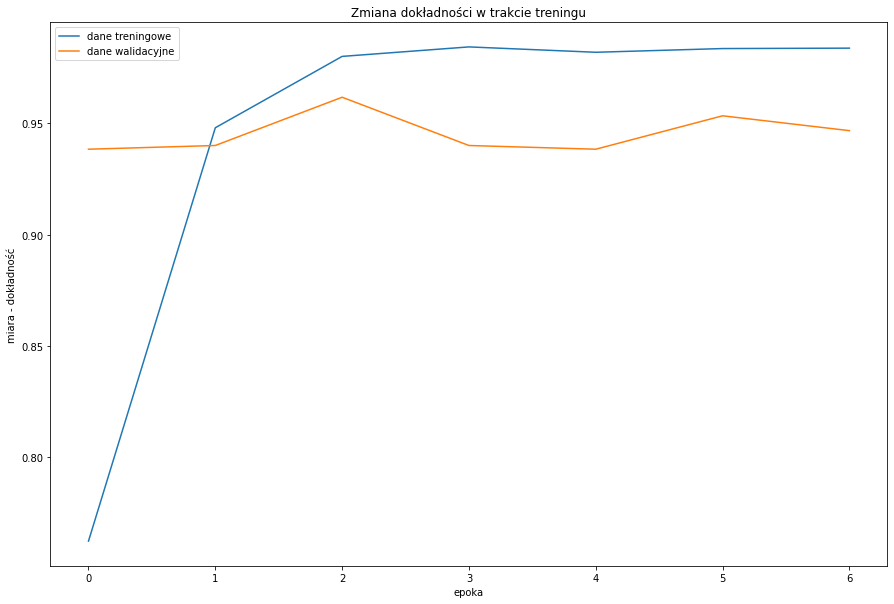

In [ ]:
figure = plt.figure(figsize=(15,10))
plt.title("Zmiana dokładności w trakcie treningu")
figure_acc = figure.add_subplot(1,1,1)
figure_acc.set_xlabel('epoka')
figure_acc.set_ylabel('miara - dokładność')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['dane treningowe', 'dane walidacyjne'])

plt.show()

In [ ]:
! unzip "/content/drive/MyDrive/pieski_test_foldery.zip"

In [ ]:
dogs_test = tf.keras.utils.image_dataset_from_directory("/content/pieski_test_foldery",
                                                   image_size=(224, 224))

Found 150 files belonging to 15 classes.


In [ ]:
dog_labels =['beagle', 'bernese', 'border_collie', 'chihuahua', 'corgi', 
             'dachshund', 'golden_retriever', 'husky', 'labrador', 'pomeranian', 
             'pug', 'rottweiler', 'samoyed', 'shiba_inu', 'yorkshire_terrier']

In [ ]:
true_labels = []
predicted_labels = []
#plt.figure(figsize=(30, 30))
for images, labels in dogs_test:
  for i in range(labels.shape[0]):
    #ax = plt.subplot(4,8, i + 1)
    #plt.imshow(images[i].numpy().astype("uint8"))
    image = np.expand_dims(images[i], 0)
    prediction = model.predict(image)
    breed = (dog_labels[prediction.argmax()])
    true_labels.append(dog_labels[labels[i]])
    predicted_labels.append(breed)
    #plt.title("Prawdziwa klasa: "+ str(dog_labels[labels[i]]))
    #plt.xlabel("Przewidywana klasa: " + str(breed))
 


In [ ]:
len(predicted_labels)

150

In [ ]:
acc = accuracy_score(true_labels, predicted_labels)*100
print("Dokładność: " + str(round(acc, 2)) + "%")


Dokładność: 97.33%


In [ ]:
print(confusion_matrix(true_labels, predicted_labels))


[[10  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  9  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  1  0  8  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 10  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 10  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 10  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  9  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 10]]


In [ ]:
print(classification_report(true_labels, predicted_labels))

                   precision    recall  f1-score   support

           beagle       1.00      1.00      1.00        10
          bernese       1.00      1.00      1.00        10
    border_collie       1.00      1.00      1.00        10
        chihuahua       0.83      1.00      0.91        10
            corgi       1.00      0.90      0.95        10
        dachshund       0.91      1.00      0.95        10
 golden_retriever       0.91      1.00      0.95        10
            husky       1.00      1.00      1.00        10
         labrador       1.00      0.80      0.89        10
       pomeranian       1.00      1.00      1.00        10
              pug       1.00      1.00      1.00        10
       rottweiler       1.00      1.00      1.00        10
          samoyed       1.00      1.00      1.00        10
        shiba_inu       1.00      0.90      0.95        10
yorkshire_terrier       1.00      1.00      1.00        10

         accuracy                           0.97      

## Inception V3 without transfer learning - 60 epochs

In [ ]:
base_model = tf.keras.applications.InceptionV3(input_shape=(224, 224, 3),include_top=False,weights=None)
base_model.trainable = True
keras_model = tf.keras.Sequential()
keras_model.add(base_model)
keras_model.add(tf.keras.layers.Conv2D(16,kernel_size=4,activation='relu', input_shape =(224,224,3), padding='SAME'))
keras_model.add(tf.keras.layers.BatchNormalization())
keras_model.add(tf.keras.layers.MaxPooling2D())
keras_model.add(tf.keras.layers.Flatten())
keras_model.add(tf.keras.layers.Dropout(0.3))
keras_model.add(tf.keras.layers.Dense(100, activation='relu'))
keras_model.add(tf.keras.layers.Dense(15, activation='sigmoid'))
model = keras_model
model.summary()

adam = tf.keras.optimizers.Adam(lr=1e-4)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = adam,
    metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 conv2d_95 (Conv2D)          (None, 5, 5, 16)          524304    
                                                                 
 batch_normalization_95 (Bat  (None, 5, 5, 16)         64        
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dropout_1 (Dropout)         (None, 64)               

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
epochs = 60
history = model.fit(
    dogs_train,
    epochs=epochs,
    validation_data=dogs_valid)

In [ ]:
figure = plt.figure(figsize=(15,10))
plt.title("Zmiana dokładności w trakcie treningu")
figure_acc = figure.add_subplot(1,1,1)
figure_acc.set_xlabel('epoka')
figure_acc.set_ylabel('miara - dokładność')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['dane treningowe', 'dane walidacyjne'])

plt.show()

In [ ]:
! unzip "/content/drive/MyDrive/pieski_test_foldery.zip"

In [ ]:
dogs_test = tf.keras.utils.image_dataset_from_directory("/content/pieski_test_foldery",
                                                   image_size=(224, 224))

In [ ]:
dog_labels =['beagle', 'bernese', 'border_collie', 'chihuahua', 'corgi', 
             'dachshund', 'golden_retriever', 'husky', 'labrador', 'pomeranian', 
             'pug', 'rottweiler', 'samoyed', 'shiba_inu', 'yorkshire_terrier']

In [ ]:
true_labels = []
predicted_labels = []
#plt.figure(figsize=(30, 30))
for images, labels in dogs_test:
  for i in range(labels.shape[0]):
    #ax = plt.subplot(4,8, i + 1)
    #plt.imshow(images[i].numpy().astype("uint8"))
    image = np.expand_dims(images[i], 0)
    prediction = model.predict(image)
    breed = (dog_labels[prediction.argmax()])
    true_labels.append(dog_labels[labels[i]])
    predicted_labels.append(breed)
    #plt.title("Prawdziwa klasa: "+ str(dog_labels[labels[i]]))
    #plt.xlabel("Przewidywana klasa: " + str(breed))

In [ ]:
acc = accuracy_score(true_labels, predicted_labels)*100
print("Dokładność: " + str(round(acc, 2)) + "%")

In [ ]:
print(confusion_matrix(true_labels, predicted_labels))

In [ ]:
print(classification_report(true_labels, predicted_labels))

## MobileNetV2 with transfer learning - 7 epochs

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),include_top=False,weights='imagenet')
base_model.trainable = True
keras_model = tf.keras.Sequential()
keras_model.add(base_model)
keras_model.add(tf.keras.layers.Conv2D(16,kernel_size=4,activation='relu', input_shape =(224,224,3), padding='SAME'))
keras_model.add(tf.keras.layers.BatchNormalization())
keras_model.add(tf.keras.layers.MaxPooling2D())
keras_model.add(tf.keras.layers.Flatten())
keras_model.add(tf.keras.layers.Dropout(0.3))
keras_model.add(tf.keras.layers.Dense(100, activation='relu'))
keras_model.add(tf.keras.layers.Dense(15, activation='sigmoid'))
model = keras_model
model.summary()

adam = tf.keras.optimizers.Adam(lr=1e-4)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = adam,
    metrics=['accuracy'])

9420800/9406464 [==============================] - 0s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 conv2d_191 (Conv2D)         (None, 7, 7, 16)          327696    
                                                                 
 batch_normalization_191 (Ba  (None, 7, 7, 16)         64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 3, 3, 16)         0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 144)               0 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
epochs = 7
history = model.fit(
    dogs_train,
    epochs=epochs,
    validation_data=dogs_valid)

Epoch 1/7


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 83s 403ms/step - loss: 1.1164 - accuracy: 0.6891 - val_loss: 1.0052 - val_accuracy: 0.7000
Epoch 2/7
169/169 [==============================] - 66s 388ms/step - loss: 0.2631 - accuracy: 0.9343 - val_loss: 0.3834 - val_accuracy: 0.8950
Epoch 3/7
169/169 [==============================] - 67s 389ms/step - loss: 0.1250 - accuracy: 0.9754 - val_loss: 0.2235 - val_accuracy: 0.9317
Epoch 4/7
169/169 [==============================] - 67s 391ms/step - loss: 0.0654 - accuracy: 0.9869 - val_loss: 0.1508 - val_accuracy: 0.9583
Epoch 5/7
169/169 [==============================] - 66s 384ms/step - loss: 0.0385 - accuracy: 0.9959 - val_loss: 0.1337 - val_accuracy: 0.9600
Epoch 6/7
169/169 [==============================] - 66s 384ms/step - loss: 0.0321 - accuracy: 0.9954 - val_loss: 0.0905 - val_accuracy: 0.9750
Epoch 7/7
169/169 [==============================] - 66s 387ms/step - loss: 0.0302 - accuracy: 0.9931 - val_loss: 0.1127 - val_accuracy: 0.9600


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


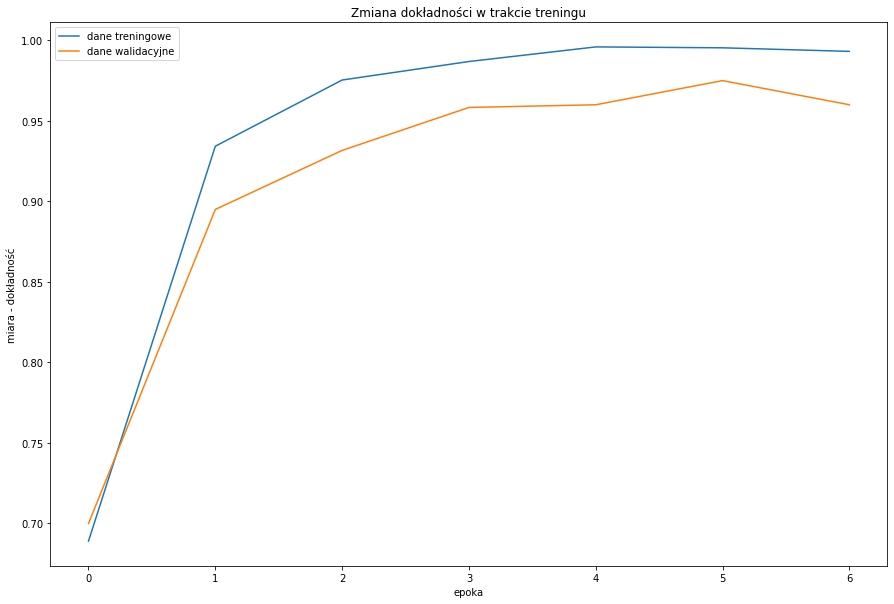

In [ ]:
figure = plt.figure(figsize=(15,10))
plt.title("Zmiana dokładności w trakcie treningu")
figure_acc = figure.add_subplot(1,1,1)
figure_acc.set_xlabel('epoka')
figure_acc.set_ylabel('miara - dokładność')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['dane treningowe', 'dane walidacyjne'])

plt.show()

In [ ]:
! unzip "/content/drive/MyDrive/pieski_test_foldery.zip"

In [ ]:
dogs_test = tf.keras.utils.image_dataset_from_directory("/content/pieski_test_foldery",
                                                   image_size=(224, 224))

Found 150 files belonging to 15 classes.


In [ ]:
dog_labels =['beagle', 'bernese', 'border_collie', 'chihuahua', 'corgi', 
             'dachshund', 'golden_retriever', 'husky', 'labrador', 'pomeranian', 
             'pug', 'rottweiler', 'samoyed', 'shiba_inu', 'yorkshire_terrier']

In [ ]:
true_labels = []
predicted_labels = []
#plt.figure(figsize=(30, 30))
for images, labels in dogs_test:
  for i in range(labels.shape[0]):
    #ax = plt.subplot(4,8, i + 1)
    #plt.imshow(images[i].numpy().astype("uint8"))
    image = np.expand_dims(images[i], 0)
    prediction = model.predict(image)
    breed = (dog_labels[prediction.argmax()])
    true_labels.append(dog_labels[labels[i]])
    predicted_labels.append(breed)
    #plt.title("Prawdziwa klasa: "+ str(dog_labels[labels[i]]))
    #plt.xlabel("Przewidywana klasa: " + str(breed))

In [ ]:
acc = accuracy_score(true_labels, predicted_labels)*100
print("Dokładność: " + str(round(acc, 2)) + "%")

Dokładność: 98.67%


In [ ]:
print(confusion_matrix(true_labels, predicted_labels))

[[10  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  9  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 10  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 10  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 10  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  9  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 10]]


In [ ]:
print(classification_report(true_labels, predicted_labels))

                   precision    recall  f1-score   support

           beagle       1.00      1.00      1.00        10
          bernese       1.00      1.00      1.00        10
    border_collie       1.00      1.00      1.00        10
        chihuahua       0.91      1.00      0.95        10
            corgi       1.00      1.00      1.00        10
        dachshund       1.00      1.00      1.00        10
 golden_retriever       0.91      1.00      0.95        10
            husky       1.00      1.00      1.00        10
         labrador       1.00      0.90      0.95        10
       pomeranian       1.00      1.00      1.00        10
              pug       1.00      1.00      1.00        10
       rottweiler       1.00      1.00      1.00        10
          samoyed       1.00      1.00      1.00        10
        shiba_inu       1.00      0.90      0.95        10
yorkshire_terrier       1.00      1.00      1.00        10

         accuracy                           0.99      

## MobileNetV2 without transfer learning - 60 epochs

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),include_top=False,weights=None)
base_model.trainable = True
keras_model = tf.keras.Sequential()
keras_model.add(base_model)
keras_model.add(tf.keras.layers.Conv2D(16,kernel_size=4,activation='relu', input_shape =(224,224,3), padding='SAME'))
keras_model.add(tf.keras.layers.BatchNormalization())
keras_model.add(tf.keras.layers.MaxPooling2D())
keras_model.add(tf.keras.layers.Flatten())
keras_model.add(tf.keras.layers.Dropout(0.3))
keras_model.add(tf.keras.layers.Dense(100, activation='relu'))
keras_model.add(tf.keras.layers.Dense(15, activation='sigmoid'))
model = keras_model
model.summary()

adam = tf.keras.optimizers.Adam(lr=1e-4)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = adam,
    metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 conv2d_756 (Conv2D)         (None, 7, 7, 16)          327696    
                                                                 
 batch_normalization_756 (Ba  (None, 7, 7, 16)         64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 3, 3, 16)         0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 144)               0         
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
epochs = 60
history = model.fit(
    dogs_train,
    epochs=epochs,
    validation_data=dogs_valid)

In [ ]:
figure = plt.figure(figsize=(15,10))
plt.title("Zmiana dokładności w trakcie treningu")
figure_acc = figure.add_subplot(1,1,1)
figure_acc.set_xlabel('epoka')
figure_acc.set_ylabel('miara - dokładność')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['dane treningowe', 'dane walidacyjne'])

plt.show()

In [ ]:
! unzip "/content/drive/MyDrive/pieski_test_foldery.zip"

In [ ]:
dogs_test = tf.keras.utils.image_dataset_from_directory("/content/pieski_test_foldery",
                                                   image_size=(224, 224))

Found 150 files belonging to 15 classes.


In [ ]:
dog_labels =['beagle', 'bernese', 'border_collie', 'chihuahua', 'corgi', 
             'dachshund', 'golden_retriever', 'husky', 'labrador', 'pomeranian', 
             'pug', 'rottweiler', 'samoyed', 'shiba_inu', 'yorkshire_terrier']

In [ ]:
true_labels = []
predicted_labels = []
#plt.figure(figsize=(30, 30))
for images, labels in dogs_test:
  for i in range(labels.shape[0]):
    #ax = plt.subplot(4,8, i + 1)
    #plt.imshow(images[i].numpy().astype("uint8"))
    image = np.expand_dims(images[i], 0)
    prediction = model.predict(image)
    breed = (dog_labels[prediction.argmax()])
    true_labels.append(dog_labels[labels[i]])
    predicted_labels.append(breed)
    #plt.title("Prawdziwa klasa: "+ str(dog_labels[labels[i]]))
    #plt.xlabel("Przewidywana klasa: " + str(breed))

In [ ]:
acc = accuracy_score(true_labels, predicted_labels)*100
print("Dokładność: " + str(round(acc, 2)) + "%")

In [ ]:
print(confusion_matrix(true_labels, predicted_labels))

In [ ]:
print(classification_report(true_labels, predicted_labels))

## ResNet101 with transfer learning - 7 epochs

In [ ]:
base_model = tf.keras.applications.ResNet101(input_shape=(224, 224, 3),include_top=False,weights='imagenet')
base_model.trainable = True
keras_model = tf.keras.Sequential()
keras_model.add(base_model)
keras_model.add(tf.keras.layers.Conv2D(16,kernel_size=4,activation='relu', input_shape =(224,224,3), padding='SAME'))
keras_model.add(tf.keras.layers.BatchNormalization())
keras_model.add(tf.keras.layers.MaxPooling2D())
keras_model.add(tf.keras.layers.Flatten())
keras_model.add(tf.keras.layers.Dropout(0.3))
keras_model.add(tf.keras.layers.Dense(100, activation='relu'))
keras_model.add(tf.keras.layers.Dense(15, activation='sigmoid'))
model = keras_model
model.summary()

adam = tf.keras.optimizers.Adam(lr=1e-4)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = adam,
    metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 7, 7, 2048)        42658176  
                                                                 
 conv2d_192 (Conv2D)         (None, 7, 7, 16)          524304    
                                                                 
 batch_normalization_192 (Ba  (None, 7, 7, 16)         64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 3, 3, 16)         0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 144)               0         
                                                                 
 dropout_4 (Dropout)         (None, 144)              

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
epochs = 7
history = model.fit(
    dogs_train,
    epochs=epochs,
    validation_data=dogs_valid)

Epoch 1/7


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 230s 1s/step - loss: 0.9902 - accuracy: 0.7131 - val_loss: 0.3349 - val_accuracy: 0.9017
Epoch 2/7
169/169 [==============================] - 200s 1s/step - loss: 0.2220 - accuracy: 0.9489 - val_loss: 0.2439 - val_accuracy: 0.9400
Epoch 3/7
169/169 [==============================] - 200s 1s/step - loss: 0.0710 - accuracy: 0.9852 - val_loss: 0.2078 - val_accuracy: 0.9467
Epoch 4/7
169/169 [==============================] - 200s 1s/step - loss: 0.0478 - accuracy: 0.9922 - val_loss: 0.2075 - val_accuracy: 0.9483
Epoch 5/7
169/169 [==============================] - 199s 1s/step - loss: 0.0834 - accuracy: 0.9824 - val_loss: 0.2456 - val_accuracy: 0.9400
Epoch 6/7
169/169 [==============================] - 200s 1s/step - loss: 0.0916 - accuracy: 0.9776 - val_loss: 0.2836 - val_accuracy: 0.9233
Epoch 7/7
169/169 [==============================] - 200s 1s/step - loss: 0.0758 - accuracy: 0.9809 - val_loss: 0.4680 - val_accuracy: 0.8883


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


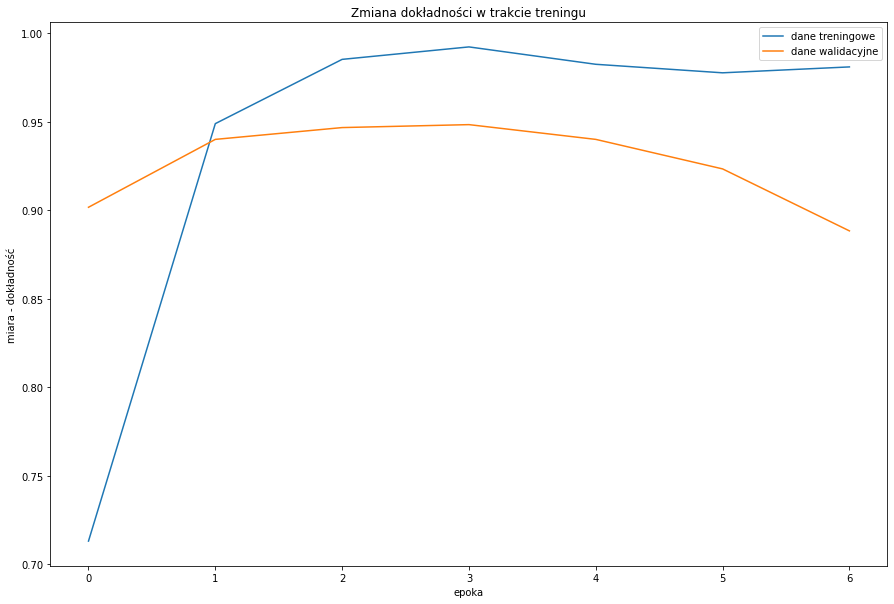

In [ ]:
figure = plt.figure(figsize=(15,10))
plt.title("Zmiana dokładności w trakcie treningu")
figure_acc = figure.add_subplot(1,1,1)
figure_acc.set_xlabel('epoka')
figure_acc.set_ylabel('miara - dokładność')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['dane treningowe', 'dane walidacyjne'])

plt.show()

In [ ]:
!unzip "/content/drive/MyDrive/pieski_test_foldery.zip"

In [ ]:
dogs_test = tf.keras.utils.image_dataset_from_directory("/content/pieski_test_foldery",
                                                   image_size=(224, 224))

Found 150 files belonging to 15 classes.


In [ ]:
dog_labels =['beagle', 'bernese', 'border_collie', 'chihuahua', 'corgi', 
             'dachshund', 'golden_retriever', 'husky', 'labrador', 'pomeranian', 
             'pug', 'rottweiler', 'samoyed', 'shiba_inu', 'yorkshire_terrier']

In [ ]:
true_labels = []
predicted_labels = []
#plt.figure(figsize=(30, 30))
for images, labels in dogs_test:
  for i in range(labels.shape[0]):
    #ax = plt.subplot(4,8, i + 1)
    #plt.imshow(images[i].numpy().astype("uint8"))
    image = np.expand_dims(images[i], 0)
    prediction = model.predict(image)
    breed = (dog_labels[prediction.argmax()])
    true_labels.append(dog_labels[labels[i]])
    predicted_labels.append(breed)
    #plt.title("Prawdziwa klasa: "+ str(dog_labels[labels[i]]))
    #plt.xlabel("Przewidywana klasa: " + str(breed))

In [ ]:
acc = accuracy_score(true_labels, predicted_labels)*100
print("Dokładność: " + str(round(acc, 2)) + "%")

Dokładność: 92.0%


In [ ]:
print(confusion_matrix(true_labels, predicted_labels))

[[10  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  9  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  8  0  0  0  0  0  0  0  1  1  0]
 [ 0  0  0  0  0  9  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  1  0  5  0  2  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  9  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 10  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  8  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 10]]


In [ ]:
print(classification_report(true_labels, predicted_labels))

                   precision    recall  f1-score   support

           beagle       1.00      1.00      1.00        10
          bernese       0.91      1.00      0.95        10
    border_collie       1.00      0.90      0.95        10
        chihuahua       1.00      1.00      1.00        10
            corgi       1.00      0.80      0.89        10
        dachshund       0.75      0.90      0.82        10
 golden_retriever       0.91      1.00      0.95        10
            husky       1.00      1.00      1.00        10
         labrador       1.00      0.50      0.67        10
       pomeranian       1.00      0.90      0.95        10
              pug       0.77      1.00      0.87        10
       rottweiler       0.89      0.80      0.84        10
          samoyed       0.83      1.00      0.91        10
        shiba_inu       0.91      1.00      0.95        10
yorkshire_terrier       1.00      1.00      1.00        10

         accuracy                           0.92      

## VGG16 with transfer learning - 15 epochs



In [ ]:
base_model = tf.keras.applications.VGG16(input_shape=(224, 224, 3),include_top=False,weights='imagenet')
base_model.trainable = True
keras_model = tf.keras.Sequential()
keras_model.add(base_model)
keras_model.add(tf.keras.layers.Conv2D(16,kernel_size=4,activation='relu', input_shape =(224,224,3), padding='SAME'))
keras_model.add(tf.keras.layers.BatchNormalization())
keras_model.add(tf.keras.layers.MaxPooling2D())
keras_model.add(tf.keras.layers.Flatten())
keras_model.add(tf.keras.layers.Dropout(0.3))
keras_model.add(tf.keras.layers.Dense(100, activation='relu'))
keras_model.add(tf.keras.layers.Dense(15, activation='sigmoid'))
model = keras_model
model.summary()

adam = tf.keras.optimizers.Adam(lr=1e-4)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = adam,
    metrics=['accuracy'])

58900480/58889256 [==============================] - 2s 0us/step
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 conv2d_193 (Conv2D)         (None, 7, 7, 16)          131088    
                                                                 
 batch_normalization_193 (Ba  (None, 7, 7, 16)         64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 3, 3, 16)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 144)               0         
                                                       

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
epochs = 15
history = model.fit(
    dogs_train,
    epochs=epochs,
    validation_data=dogs_valid)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 172s 899ms/step - loss: 2.7748 - accuracy: 0.1187 - val_loss: 2.4827 - val_accuracy: 0.1717
Epoch 2/15
169/169 [==============================] - 143s 841ms/step - loss: 2.0887 - accuracy: 0.3081 - val_loss: 1.9423 - val_accuracy: 0.3600
Epoch 3/15
169/169 [==============================] - 143s 845ms/step - loss: 1.4450 - accuracy: 0.5324 - val_loss: 1.4195 - val_accuracy: 0.6217
Epoch 4/15
169/169 [==============================] - 144s 849ms/step - loss: 0.8804 - accuracy: 0.7181 - val_loss: 0.9858 - val_accuracy: 0.7483
Epoch 5/15
169/169 [==============================] - 142s 838ms/step - loss: 0.5417 - accuracy: 0.8422 - val_loss: 0.6073 - val_accuracy: 0.8150
Epoch 6/15
169/169 [==============================] - 144s 850ms/step - loss: 0.3262 - accuracy: 0.9109 - val_loss: 0.4745 - val_accuracy: 0.8650
Epoch 7/15
169/169 [==============================] - 142s 839ms/step - loss: 0.2068 - accuracy: 0.9459 - val_loss: 0.4530 - val_accura

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


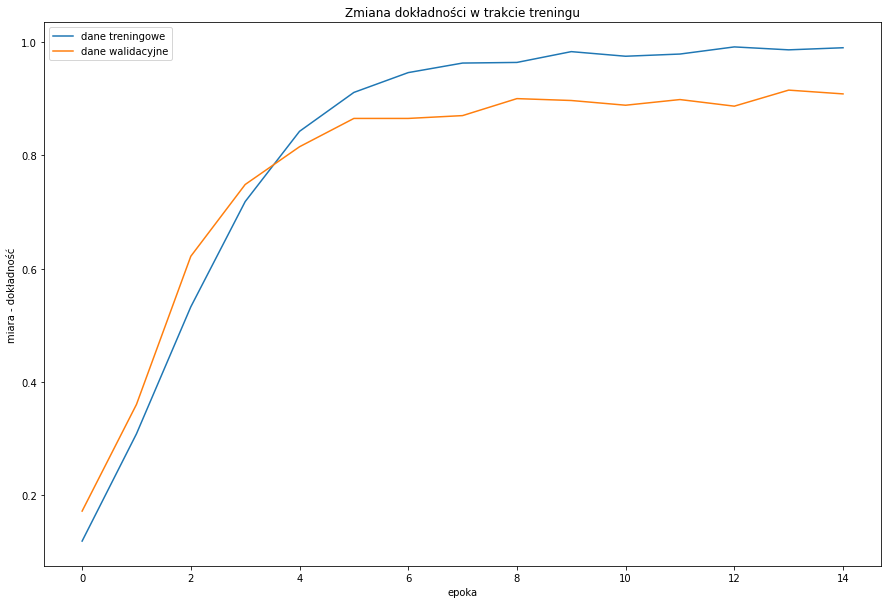

In [ ]:
figure = plt.figure(figsize=(15,10))
plt.title("Zmiana dokładności w trakcie treningu")
figure_acc = figure.add_subplot(1,1,1)
figure_acc.set_xlabel('epoka')
figure_acc.set_ylabel('miara - dokładność')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['dane treningowe', 'dane walidacyjne'])

plt.show()

In [ ]:
! unzip "/content/drive/MyDrive/pieski_test_foldery.zip"

In [ ]:
dogs_test = tf.keras.utils.image_dataset_from_directory("/content/pieski_test_foldery",
                                                   image_size=(224, 224))

Found 150 files belonging to 15 classes.


In [ ]:
dog_labels =['beagle', 'bernese', 'border_collie', 'chihuahua', 'corgi', 
             'dachshund', 'golden_retriever', 'husky', 'labrador', 'pomeranian', 
             'pug', 'rottweiler', 'samoyed', 'shiba_inu', 'yorkshire_terrier']

In [ ]:
true_labels = []
predicted_labels = []
#plt.figure(figsize=(30, 30))
for images, labels in dogs_test:
  for i in range(labels.shape[0]):
    #ax = plt.subplot(4,8, i + 1)
    #plt.imshow(images[i].numpy().astype("uint8"))
    image = np.expand_dims(images[i], 0)
    prediction = model.predict(image)
    breed = (dog_labels[prediction.argmax()])
    true_labels.append(dog_labels[labels[i]])
    predicted_labels.append(breed)
    #plt.title("Prawdziwa klasa: "+ str(dog_labels[labels[i]]))
    #plt.xlabel("Przewidywana klasa: " + str(breed))

In [ ]:
acc = accuracy_score(true_labels, predicted_labels)*100
print("Dokładność: " + str(round(acc, 2)) + "%")

Dokładność: 90.67%


In [ ]:
print(confusion_matrix(true_labels, predicted_labels))

[[ 7  1  0  0  1  0  0  0  1  0  0  0  0  0  0]
 [ 0  8  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  9  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  9  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  1  7  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  9  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  8  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 10  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 10  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  9  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 10]]


In [ ]:
print(classification_report(true_labels, predicted_labels))

                   precision    recall  f1-score   support

           beagle       1.00      0.70      0.82        10
          bernese       0.80      0.80      0.80        10
    border_collie       0.75      0.90      0.82        10
        chihuahua       0.90      0.90      0.90        10
            corgi       0.78      0.70      0.74        10
        dachshund       1.00      0.90      0.95        10
 golden_retriever       0.91      1.00      0.95        10
            husky       1.00      1.00      1.00        10
         labrador       0.89      0.80      0.84        10
       pomeranian       0.91      1.00      0.95        10
              pug       0.91      1.00      0.95        10
       rottweiler       0.91      1.00      0.95        10
          samoyed       1.00      1.00      1.00        10
        shiba_inu       0.90      0.90      0.90        10
yorkshire_terrier       1.00      1.00      1.00        10

         accuracy                           0.91      

## VGG without transfer learning - 60 epochs

In [ ]:
base_model = tf.keras.applications.VGG16(input_shape=(224, 224, 3),include_top=False,weights=None)
base_model.trainable = True
keras_model = tf.keras.Sequential()
keras_model.add(base_model)
keras_model.add(tf.keras.layers.Conv2D(16,kernel_size=4,activation='relu', input_shape =(224,224,3), padding='SAME'))
keras_model.add(tf.keras.layers.BatchNormalization())
keras_model.add(tf.keras.layers.MaxPooling2D())
keras_model.add(tf.keras.layers.Flatten())
keras_model.add(tf.keras.layers.Dropout(0.3))
keras_model.add(tf.keras.layers.Dense(100, activation='relu'))
keras_model.add(tf.keras.layers.Dense(15, activation='sigmoid'))
model = keras_model
model.summary()

adam = tf.keras.optimizers.Adam(lr=1e-4)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = adam,
    metrics=['accuracy'])

In [ ]:
epochs = 60
history = model.fit(
    dogs_train,
    epochs=epochs,
    validation_data=dogs_valid)

In [ ]:
figure = plt.figure(figsize=(15,10))
plt.title("Zmiana dokładności w trakcie treningu")
figure_acc = figure.add_subplot(1,1,1)
figure_acc.set_xlabel('epoka')
figure_acc.set_ylabel('miara - dokładność')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['dane treningowe', 'dane walidacyjne'])

plt.show()

In [ ]:
! unzip "/content/drive/MyDrive/pieski_test_foldery.zip"

In [ ]:
dogs_test = tf.keras.utils.image_dataset_from_directory("/content/pieski_test_foldery",
                                                   image_size=(224, 224))

In [ ]:
dog_labels =['beagle', 'bernese', 'border_collie', 'chihuahua', 'corgi', 
             'dachshund', 'golden_retriever', 'husky', 'labrador', 'pomeranian', 
             'pug', 'rottweiler', 'samoyed', 'shiba_inu', 'yorkshire_terrier']

In [ ]:
true_labels = []
predicted_labels = []
#plt.figure(figsize=(30, 30))
for images, labels in dogs_test:
  for i in range(labels.shape[0]):
    #ax = plt.subplot(4,8, i + 1)
    #plt.imshow(images[i].numpy().astype("uint8"))
    image = np.expand_dims(images[i], 0)
    prediction = model.predict(image)
    breed = (dog_labels[prediction.argmax()])
    true_labels.append(dog_labels[labels[i]])
    predicted_labels.append(breed)
    #plt.title("Prawdziwa klasa: "+ str(dog_labels[labels[i]]))
    #plt.xlabel("Przewidywana klasa: " + str(breed))

In [ ]:
acc = accuracy_score(true_labels, predicted_labels)*100
print("Dokładność: " + str(round(acc, 2)) + "%")

In [ ]:
print(confusion_matrix(true_labels, predicted_labels))

In [ ]:
print(classification_report(true_labels, predicted_labels))